In [18]:
import numpy as np

# Perceptron Algorithm

In [14]:
def Perceptron_alg(X,y,w_0,b_0,delta=0,max_iter=100):
    """
    Run perceptron algorithm to find a linear separator (if any) of the dataset.  

    Inputs:
        X: n by d data matrix, each row (e.g., X[i]) represents a data point (with d features), each column is a feature
        y: 1d array of labels, either +1 or -1
        w_0: initial weights
        b_0: initial bias
        delta: minimum threshold/margin/tolerance, must be non-negative, default is set to zero
        max_iter: maximum number of passes/rounds to run over the whole dataset
  
    Outputs:
        Solution w (weight) and b (bias), which in together gives the linear separator <w,x>+b=0

    """
    n,d = X.shape
    w = w_0
    b = b_0
    for t in range(max_iter):
        idx_list = np.arange(n)
        np.random.shuffle(idx_list)
        num_mistakes = 0
        for i in idx_list:
            if y[i] * (np.dot(w,X[i]) + b) <= delta:
                w = w + y[i] * X[i]
                b = b + y[i]
                num_mistakes += 1
        if num_mistakes == 0:
            break
    return w, b


# A 2d example

In [15]:
import matplotlib.pyplot as plt

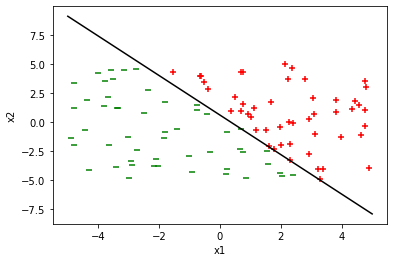

w is [11.6014244   6.81669103] and b is -4.0


In [16]:
# Generate an artificial 2d separable dataset
# The dataset is separated by 2x_1 + x_2 - 1 = 0
np.random.seed(0)
X = np.random.uniform(-5,5,(100,2))
y = np.zeros(100)
for i in range(100):
    if np.dot(X[i],np.array([2,1]))-1 > 0:
        y[i] = 1
    else:
        y[i] = -1

# Scatter plot the data points
pos_idx = (y[:] == 1)
neg_idx = (y[:] == -1)
X_pos = X[pos_idx] 
X_neg = X[neg_idx] 
plt.scatter(X_pos[:,0],X_pos[:,1],marker='+',c='r')
plt.scatter(X_neg[:,0],X_neg[:,1],marker='_',c='g')

# Run peceptron to find the linear separator and plot it
w_0 = np.zeros(2)
b_0 = 0
w, b = Perceptron_alg(X,y,w_0,b_0,delta=0,max_iter=100)
x1 = np.linspace(-5,5,100)
x2 = (-b-w[0]*x1)/w[1]
plt.plot(x1,x2,c='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# We can also print out w and b
print("w is", w, "and b is",b)